# Computer Vision Masterclass - Recognition of gestures and actions


## Detecting body points

### Importing the libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow
import numpy as np

### Loading the image

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
image = cv2.imread('Computer_Vision_Masterclass_files\Images\megan.jpg')

In [4]:
#cv2_imshow(image)

In [5]:
# Check if the image was loaded successfully
if image is not None:
    # Display the image
    cv2.imshow('Image', image)
    # Wait for a key press and then close the window
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print('Error: Image not found or unable to be loaded.')

In [6]:
cv2.imshow('Image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [7]:
cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''
#To Display image
if X[0] is not None:
    # Display the image
    cv2.imshow('image', X[0].reshape(width, height))

    # Wait for a key press and close the window
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Error: Unable to read the image.")
'''

'\n#To Display image\nif X[0] is not None:\n    # Display the image\n    cv2.imshow(\'image\', X[0].reshape(width, height))\n\n    # Wait for a key press and close the window\n    cv2.waitKey(0)\n    cv2.destroyAllWindows()\nelse:\n    print("Error: Unable to read the image.")\n'

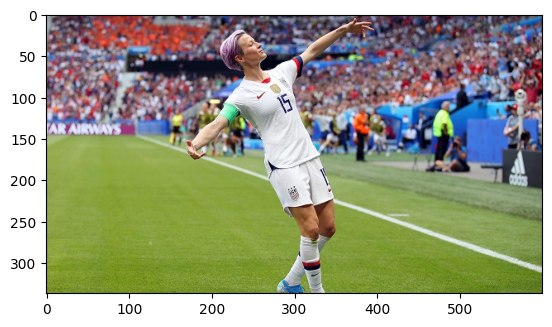

In [8]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

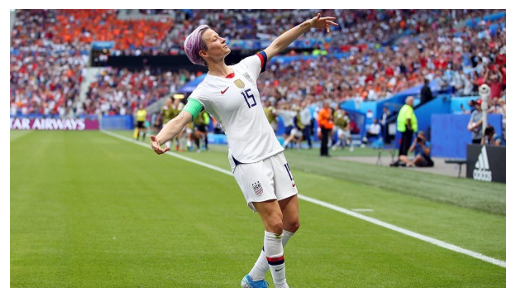

In [9]:
import cv2
import matplotlib.pyplot as plt
def show_detection(path):
  image = cv2.imread(path)
  fig = plt.gcf()
  #fig.set_size_inches(18,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  #cv2.imshow('image', cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  #cv2.waitKey(0)
  #cv2.destroyAllWindows()
  
show_detection('Computer_Vision_Masterclass_files\Images\megan.jpg')

In [10]:
image.shape, image.shape[0] * image.shape[1] * 3

((337, 600, 3), 606600)

In [11]:
type(image)

numpy.ndarray

In [12]:
# Mean subtraction: https://www.pyimagesearch.com/2017/11/06/deep-learning-opencvs-blobfromimage-works/
image_blob = cv2.dnn.blobFromImage(image = image, scalefactor = 1.0 / 255,
                                   size = (image.shape[1], image.shape[0]))

In [13]:
type(image_blob), image_blob.shape # batch

(numpy.ndarray, (1, 3, 337, 600))

### Loading the pre-trained neural network

- Caffe Deep Learning framework: https://caffe.berkeleyvision.org/

In [14]:
network = cv2.dnn.readNetFromCaffe('Computer_Vision_Masterclass_files\Weights\pose_deploy_linevec_faster_4_stages.prototxt',
                                   'Computer_Vision_Masterclass_files\Weights\pose_iter_160000.caffemodel')

In [15]:
network.getLayerNames()

('conv1_1',
 'relu1_1',
 'conv1_2',
 'relu1_2',
 'pool1_stage1',
 'conv2_1',
 'relu2_1',
 'conv2_2',
 'relu2_2',
 'pool2_stage1',
 'conv3_1',
 'relu3_1',
 'conv3_2',
 'relu3_2',
 'conv3_3',
 'relu3_3',
 'conv3_4',
 'relu3_4',
 'pool3_stage1',
 'conv4_1',
 'relu4_1',
 'conv4_2',
 'relu4_2',
 'conv4_3_CPM',
 'relu4_3_CPM',
 'conv4_4_CPM',
 'relu4_4_CPM',
 'conv5_1_CPM_L1',
 'relu5_1_CPM_L1',
 'conv5_1_CPM_L2',
 'relu5_1_CPM_L2',
 'conv5_2_CPM_L1',
 'relu5_2_CPM_L1',
 'conv5_2_CPM_L2',
 'relu5_2_CPM_L2',
 'conv5_3_CPM_L1',
 'relu5_3_CPM_L1',
 'conv5_3_CPM_L2',
 'relu5_3_CPM_L2',
 'conv5_4_CPM_L1',
 'relu5_4_CPM_L1',
 'conv5_4_CPM_L2',
 'relu5_4_CPM_L2',
 'conv5_5_CPM_L1',
 'conv5_5_CPM_L2',
 'concat_stage2',
 'Mconv1_stage2_L1',
 'Mrelu1_stage2_L1',
 'Mconv1_stage2_L2',
 'Mrelu1_stage2_L2',
 'Mconv2_stage2_L1',
 'Mrelu2_stage2_L1',
 'Mconv2_stage2_L2',
 'Mrelu2_stage2_L2',
 'Mconv3_stage2_L1',
 'Mrelu3_stage2_L1',
 'Mconv3_stage2_L2',
 'Mrelu3_stage2_L2',
 'Mconv4_stage2_L1',
 'Mrelu4_sta

In [16]:
len(network.getLayerNames())

127

### Predicting body points

In [17]:
network.setInput(image_blob)
output = network.forward()

In [18]:
# 44 -> related to the points that were detected
# (43, 75) -> information about the location
output.shape

(1, 44, 43, 75)

In [19]:
position_width = output.shape[3]
position_heigth = output.shape[2]

In [20]:
position_width

75

In [21]:
(image.shape[1] * 28) / 75

224.0

In [22]:
# minMaxLoc: https://docs.opencv.org/master/d2/de8/group__core__array.html#gab473bf2eb6d14ff97e89b355dac20707
num_points = 15
points = []
threshold = 0.1
for i in range(num_points):
  #print(i)
  confidence_map = output[0, i, :, :]
  #print(confidence_map) # candidate points
  #print(len(confidence_map))
  _, confidence, _, point = cv2.minMaxLoc(confidence_map)
  #print(confidence)
  #print(point)

  x = int((image.shape[1] * point[0]) / position_width)
  y = int((image.shape[0] * point[1]) / position_heigth)
  #print(x,y)
  if confidence > threshold:
    cv2.circle(image, (x, y), 5, (0,255,0), thickness = -1)
    cv2.putText(image, '{}'.format(i), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255))
    points.append((x,y))
  else:
    points.append(None)

In [23]:
points

[(224, 23),
 (248, 62),
 (232, 94),
 (208, 125),
 (176, 148),
 (280, 62),
 (320, 39),
 (360, 15),
 (288, 180),
 (320, 250),
 (320, 321),
 (312, 164),
 (336, 250),
 (296, 305),
 (280, 125)]

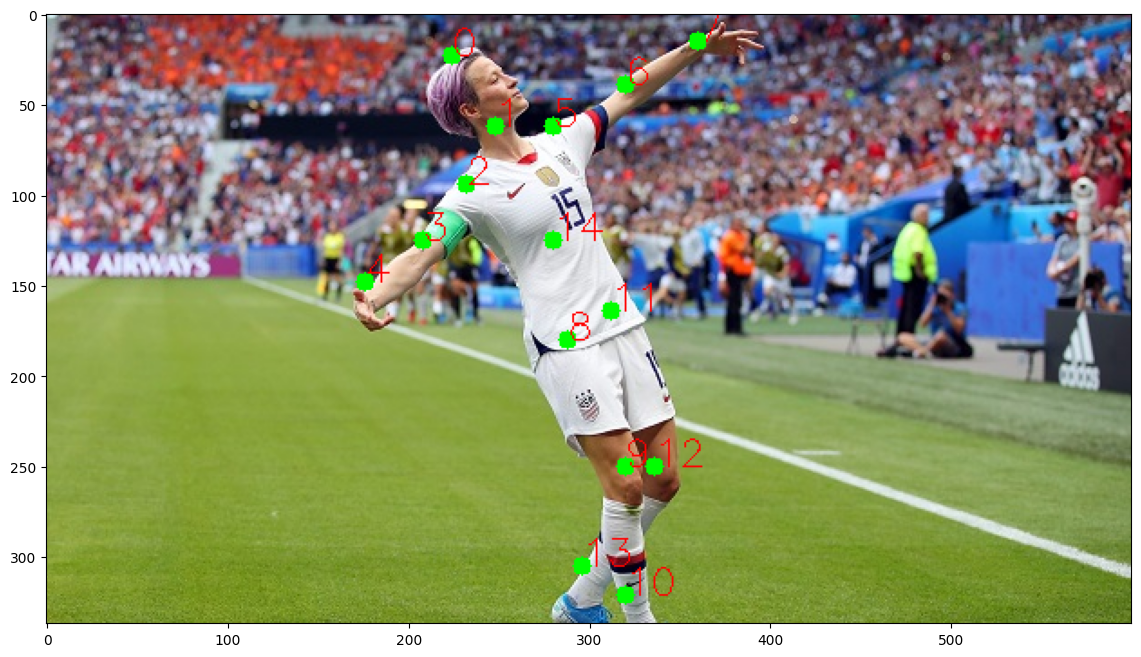

In [24]:
plt.figure(figsize=(14,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

In [25]:
point_connections = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7],[1,14],
                     [14,8], [8,9], [9,10], [14,11], [11,12], [12,13]]

In [26]:
point_connections

[[0, 1],
 [1, 2],
 [2, 3],
 [3, 4],
 [1, 5],
 [5, 6],
 [6, 7],
 [1, 14],
 [14, 8],
 [8, 9],
 [9, 10],
 [14, 11],
 [11, 12],
 [12, 13]]

In [27]:
for connection in point_connections:
  #print(connection)
  partA = connection[0]
  partB = connection[1]
  #print(partA, partB)
  if points[partA] and points[partB]:
    cv2.line(image, points[partA], points[partB], (255,0,0))

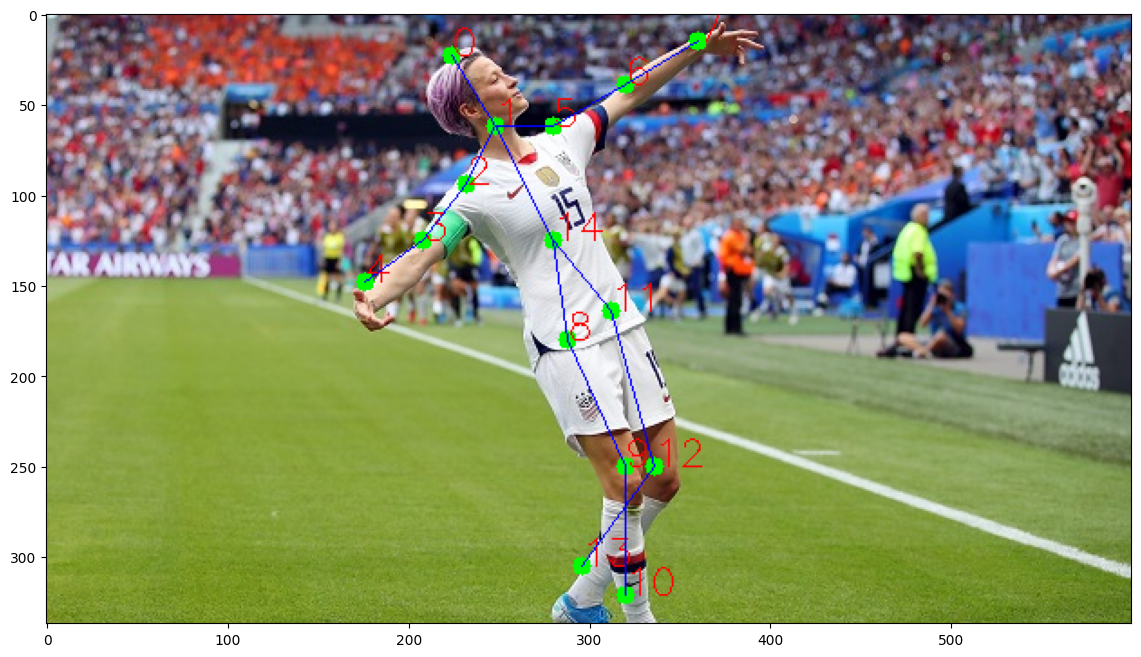

In [28]:
plt.figure(figsize=(14,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

## Detecting movements (arms above the head)

### Arms above the head in images

In [29]:
image2 = cv2.imread('Computer_Vision_Masterclass_files\Images\player.jpg')
#cv2_imshow(image2)

cv2.imshow('image', image2)
cv2.waitKey(0)
cv2.destroyAllWindows()


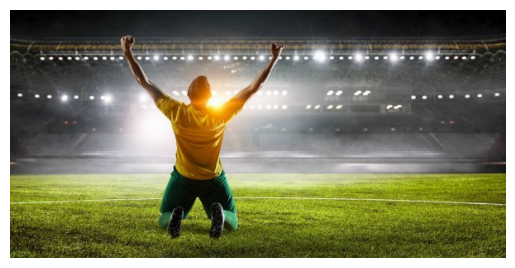

In [30]:
import cv2
import matplotlib.pyplot as plt

image2 = 'Computer_Vision_Masterclass_files\Images\player.jpg'

def show_detection1(image2):
  image = cv2.imread(image2)
  fig = plt.gcf()
  #fig.set_size_inches(18,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  #cv2.imshow('image', cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  #cv2.waitKey(0)
  #cv2.destroyAllWindows()
  
show_detection1(image2)

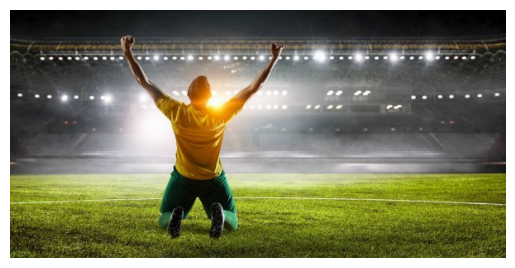

In [31]:
import cv2
import matplotlib.pyplot as plt
def show_detection(path):
  image = cv2.imread(path)
  fig = plt.gcf()
  #fig.set_size_inches(18,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  #cv2.imshow('image', cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  #cv2.waitKey(0)
  #cv2.destroyAllWindows()
  
show_detection('Computer_Vision_Masterclass_files\Images\player.jpg')

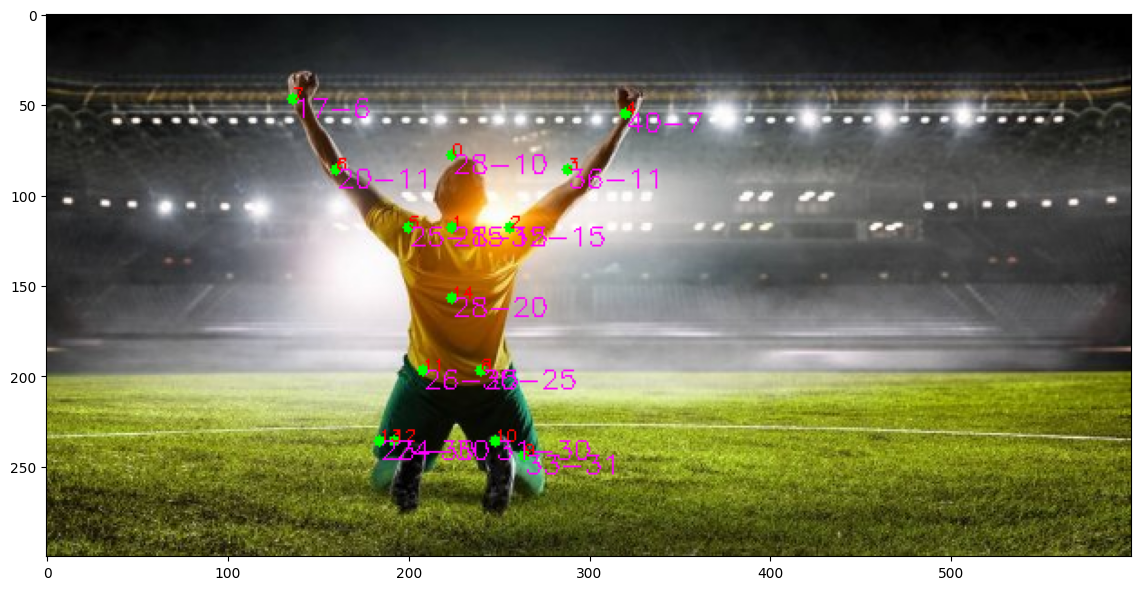

In [32]:
image2 = cv2.imread('Computer_Vision_Masterclass_files\Images\player.jpg')
image_blob2 = cv2.dnn.blobFromImage(image = image2, scalefactor = 1.0 / 255, size = (image2.shape[1], image2.shape[0]))
network.setInput(image_blob2)
output2 = network.forward()
position_width = output2.shape[3]
position_height = output2.shape[2]
num_points = 15
points = []
threshold = 0.1
for i in range(num_points):
  confidence_map = output2[0, i, :, :]
  _, confidence, _, point = cv2.minMaxLoc(confidence_map)
  x = int((image2.shape[1] * point[0]) / position_width)
  y = int((image2.shape[0] * point[1]) / position_height)

  if confidence > threshold:
    cv2.circle(image2, (x, y), 3, (0,255,0), thickness = -1)
    cv2.putText(image2, "{}".format(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, .3, (0, 0, 255))
    cv2.putText(image2, '{}-{}'.format(point[0], point[1]), (x, y + 10), cv2.FONT_HERSHEY_SIMPLEX, .5, (255,0,255))
    points.append((x, y))
  else:
    points.append(None)

plt.figure(figsize = [14,10])
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB));

In [33]:
def verify_arms_up(points):
  head, right_wrist, left_wrist = 0, 0, 0
  for i, point in enumerate(points):
    #print(i, point)
    if i == 0:
      head = point[1]
    elif i == 4:
      right_wrist = point[1]
    elif i == 7:
      left_wrist = point[1]

  #print(head, right_wrist, left_wrist)
  if right_wrist < head and left_wrist < head:
    return True
  else:
    return False

In [34]:
verify_arms_up(points)

True

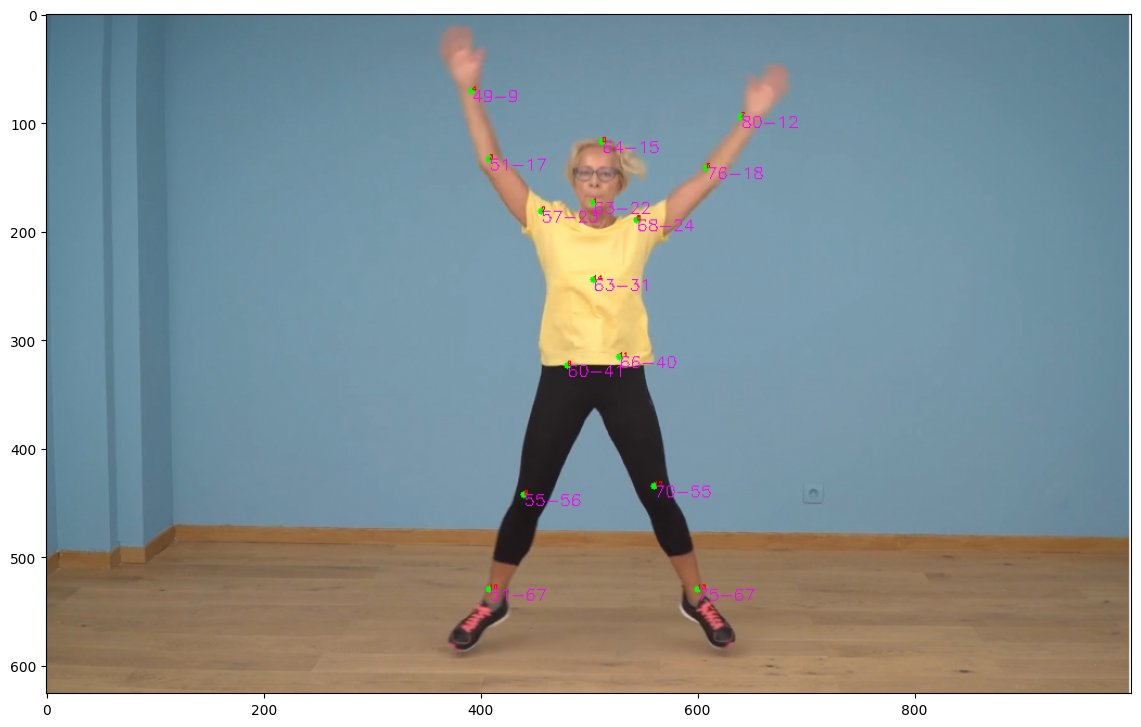

In [35]:
image = cv2.imread('Computer_Vision_Masterclass_files\Images\jump.jpg')
image_blob = cv2.dnn.blobFromImage(image = image, scalefactor = 1.0 / 255, size = (image.shape[1], image.shape[0]))
network.setInput(image_blob)
output = network.forward()
position_width = output.shape[3]
position_height = output.shape[2]
num_points = 15
points = []
threshold = 0.1
for i in range(num_points):
  confidence_map = output[0, i, :, :]
  _, confidence, _, point = cv2.minMaxLoc(confidence_map)
  x = int((image.shape[1] * point[0]) / position_width)
  y = int((image.shape[0] * point[1]) / position_height)

  if confidence > threshold:
    cv2.circle(image, (x, y), 3, (0,255,0), thickness = -1)
    cv2.putText(image, "{}".format(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, .2, (0, 0, 255))
    cv2.putText(image, "{}-{}".format(point[0], point[1]), (x, y + 10), cv2.FONT_HERSHEY_SIMPLEX, .5, (255, 0, 255))
    points.append((x, y))
  else:
    points.append(None)

plt.figure(figsize = [14,10])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

In [36]:
def verify_legs_apart(points):
  left_hip, rigth_hip = 0, 0
  left_ankle, right_ankle = 0, 0

  for i, point in enumerate(points):
    if i == 11:
      left_hip = point[0]
    elif i == 8:
      rigth_hip = point[0]
    elif i == 13:
      left_ankle = point[0]
    elif i == 10:
      rigth_ankle = point[0]

  if (left_ankle > left_hip) and (rigth_ankle < rigth_hip):
    return True
  else:
    return False

In [37]:
verify_legs_apart(points)

True

### Arms above the head in videos

- VideoWriter_fourcc: https://www.programcreek.com/python/example/89348/cv2.VideoWriter_fourcc

In [38]:
video = 'Computer_Vision_Masterclass_files\Videos\gesture1.mp4'
capture = cv2.VideoCapture(video)
connected, frame = capture.read()

In [39]:
connected

True

In [40]:
frame.shape

(1080, 808, 3)

In [41]:
result = 'Computer_Vision_Masterclass_files\Videos\gesture1_result.mp4'
save_video = cv2.VideoWriter(result, cv2.VideoWriter_fourcc(*'XVID'),  10, (frame.shape[1], frame.shape[0]))

In [42]:
# https://stackoverflow.com/questions/5217519/what-does-opencvs-cvwaitkey-function-do
threshold = 0.1
while cv2.waitKey(1) < 0:
  connected, frame = capture.read()

  if not connected:
    break

  image_blob = cv2.dnn.blobFromImage(image = frame, scalefactor = 1.0 / 255, size = (256, 256))
  network.setInput(image_blob)
  output = network.forward()
  position_height = output.shape[2]
  position_width = output.shape[3]

  num_points = 15
  points = []
  for i in range(num_points):
    confidence_map = output[0, i, :, :]
    _, confidence, _, point = cv2.minMaxLoc(confidence_map)
    x = int((frame.shape[1] * point[0]) / position_width)
    y = int((frame.shape[0] * point[1]) / position_height)
    if confidence > threshold:
      cv2.circle(frame, (x, y), 5, (0,255,0), thickness = -1)
      cv2.putText(frame, "{}".format(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, .7, (0, 0, 255))
      points.append((x, y))
    else:
      points.append(None)

  for connection in point_connections:
    partA = connection[0]
    partB = connection[1]
    if points[partA] and points[partB]:
      cv2.line(frame, points[partA], points[partB], (255,0,0))

  if verify_arms_up(points) == True and verify_legs_apart(points) == True:
    cv2.putText(frame, 'Complete', (50,200), cv2.FONT_HERSHEY_COMPLEX, 3, (0,0,255))

  #cv2.imshow(frame)

  
  save_video.write(frame)
save_video.release()

In [43]:
# https://stackoverflow.com/questions/5217519/what-does-opencvs-cvwaitkey-function-do
threshold = 0.1
while cv2.waitKey(1) < 0:
  connected, frame = capture.read()

  if not connected:
    break

  image_blob = cv2.dnn.blobFromImage(image = frame, scalefactor = 1.0 / 255, size = (256, 256))
  network.setInput(image_blob)
  output = network.forward()
  position_height = output.shape[2]
  position_width = output.shape[3]

  num_points = 15
  points = []
  for i in range(num_points):
    confidence_map = output[0, i, :, :]
    _, confidence, _, point = cv2.minMaxLoc(confidence_map)
    x = int((frame.shape[1] * point[0]) / position_width)
    y = int((frame.shape[0] * point[1]) / position_height)
    if confidence > threshold:
      cv2.circle(frame, (x, y), 5, (0,255,0), thickness = -1)
      cv2.putText(frame, "{}".format(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, .7, (0, 0, 255))
      points.append((x, y))
    else:
      points.append(None)

  for connection in point_connections:
    partA = connection[0]
    partB = connection[1]
    if points[partA] and points[partB]:
      cv2.line(frame, points[partA], points[partB], (255,0,0))

  if verify_arms_up(points) == True and verify_legs_apart(points) == True:
    cv2.putText(frame, 'Complete', (50,200), cv2.FONT_HERSHEY_COMPLEX, 3, (0,0,255))

  #cv2.imshow(frame)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

  
  save_video.write(frame)
save_video.release()

In [44]:
#cv2.imshow('MultiTracker', frame)